# Modelo basado en capas convolucionales para clasificación de dígitos

 Modelo preentrenado (formato .h5):

In [4]:
import requests

url = "https://huggingface.co/spaces/ayaanzaveri/mnist/resolve/main/mnist-model.h5"
r = requests.get(url)
with open("mnist_model.h5", "wb") as f:
    f.write(r.content)

print("Modelo guardado correctamente.")

Modelo guardado correctamente.


Usar el modelo descargado

In [5]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos de prueba
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Cargar el modelo preentrenado
model = load_model("mnist_model.h5")

# Carga el modelo con las metricas correctas

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

# Evaluar el modelo
loss, accuracy = model.evaluate(x_test, y_test)
print("Precisión en el conjunto de prueba:", accuracy)

c:\Users\ddavi\anaconda3\envs\mnist-tarea\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ddavi\anaconda3\envs\mnist-tarea\lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9926 - loss: 0.0355
Precisión en el conjunto de prueba: 0.9934999942779541


Realizar una predicción

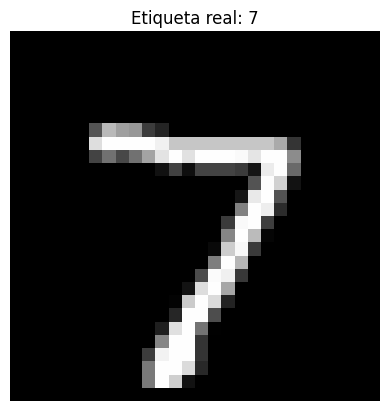

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Predicción del modelo: 7


In [6]:

idx = 0  # Cambia este índice para probar otras imágenes
img = x_test[idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Etiqueta real: {y_test[idx]}")
plt.axis('off')
plt.show()

prediction = model.predict(np.expand_dims(img, axis=0))
print("Predicción del modelo:", np.argmax(prediction))

# Para hacer

1. Mostrar los valores y visualizar al menos 10 kernels del modelo pre-entrenado
2. Mostrar las salidas obtenidas al aplicar la convolución de una imagen con los kernels del ejercicio 1.
3. Calcular las predicciones de al menos 10 imágenes propias (adjuntar evidencia del proceso de adquisición de imágenes). Aplicar y explicar el tratamiento de imágenes necesario para adecuar los datos de entrada al modelo.
4. Repetir el ejercicio 2 con al menos una de las imágenes del ejercicio 3.

**Punto 1**

Shape de los kernels: (3, 3, 1, 64)


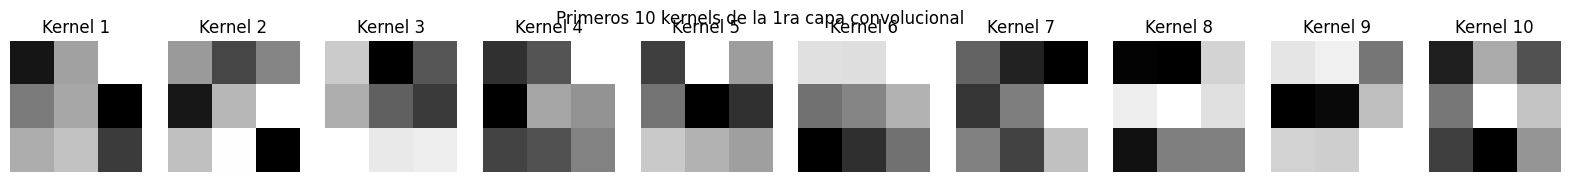

Valores del Kernel 1:
 [[-0.12700336  0.06122914  0.18749826]
 [ 0.00937727  0.06842199 -0.15611908]
 [ 0.07726777  0.1055401  -0.07614024]] 

Valores del Kernel 2:
 [[-0.00760545 -0.09749123 -0.0297416 ]
 [-0.14701729  0.0235094   0.10060543]
 [ 0.03251523  0.09855077 -0.17245239]] 

Valores del Kernel 3:
 [[ 0.07023826 -0.21103628 -0.09095965]
 [ 0.02933992 -0.07835605 -0.1302393 ]
 [ 0.14252186  0.11110964  0.11837369]] 

Valores del Kernel 4:
 [[-0.21196793 -0.13741313  0.2216292 ]
 [-0.31462792  0.03304299 -0.00644098]
 [-0.1741988  -0.14471729 -0.04228156]] 

Valores del Kernel 5:
 [[-0.11149041  0.15514414  0.01868065]
 [-0.03872406 -0.19877903 -0.13155748]
 [ 0.07934779  0.04774173  0.02208661]] 

Valores del Kernel 6:
 [[ 0.1470435   0.14372769  0.19879644]
 [-0.03609898 -0.00439419  0.0708851 ]
 [-0.22566178 -0.14623997 -0.03570205]] 

Valores del Kernel 7:
 [[ 0.00473779 -0.10265329 -0.16014414]
 [-0.07055251  0.04871018  0.26408508]
 [ 0.05364871 -0.05179111  0.15994029]] 


In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Carga el modelo preentrenado (ajusta la ruta si es necesario)
model = tf.keras.models.load_model("mnist_model.h5")

# Obtén la primera capa convolucional
first_conv_layer = None
for layer in model.layers:
    if 'conv' in layer.name:
        first_conv_layer = layer
        break

kernels = first_conv_layer.get_weights()[0]  # shape: (kernel_h, kernel_w, in_channels, out_channels)
print("Shape de los kernels:", kernels.shape)

# Visualiza los primeros 10 kernels del primer canal de entrada
fig, axes = plt.subplots(1, 10, figsize=(20,2))
for i in range(10):
    kernel = kernels[:, :, 0, i]  # Primer canal de entrada, kernel i
    axes[i].imshow(kernel, cmap='gray')
    axes[i].set_title(f'Kernel {i+1}')
    axes[i].axis('off')
plt.suptitle("Primeros 10 kernels de la 1ra capa convolucional")
plt.show()

# (Opcional) Mostrar los valores numéricos de los primeros kernels
for i in range(10):
    print(f"Valores del Kernel {i+1}:\n", kernels[:,:,0,i], "\n")


**Punto 2**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


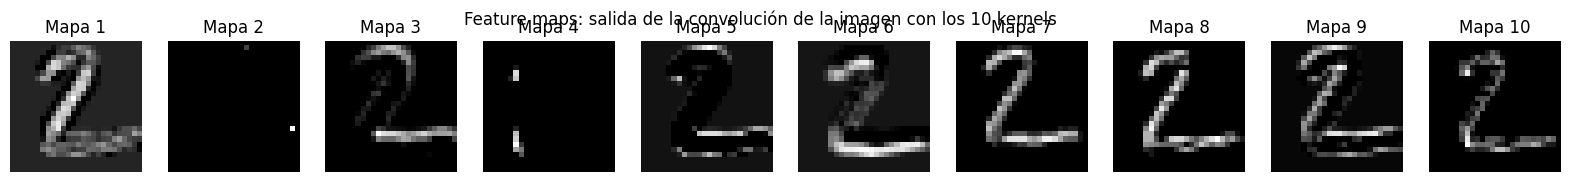

In [8]:
from tensorflow.keras import Model

# Carga una imagen de prueba de MNIST
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
img = x_test[1]  # Cambia el índice si quieres otra imagen
img_norm = img / 255.0
img_input = np.expand_dims(np.expand_dims(img_norm, axis=0), axis=-1)

# Encuentra la primera capa convolucional y la capa de entrada real
first_conv_layer = None
for layer in model.layers:
    if 'conv' in layer.name:
        first_conv_layer = layer
        break

input_layer = model.layers[0].input  # OJO: input real de la primera capa

model_cut = Model(inputs=input_layer, outputs=first_conv_layer.output)
feature_maps = model_cut.predict(img_input)

# Visualiza los 10 primeros feature maps (salidas de la convolución)
fig, axes = plt.subplots(1, 10, figsize=(20,2))
for i in range(10):
    axes[i].imshow(feature_maps[0, :, :, i], cmap='gray')
    axes[i].set_title(f'Mapa {i+1}')
    axes[i].axis('off')
plt.suptitle("Feature maps: salida de la convolución de la imagen con los 10 kernels")
plt.show()



PUNTO 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


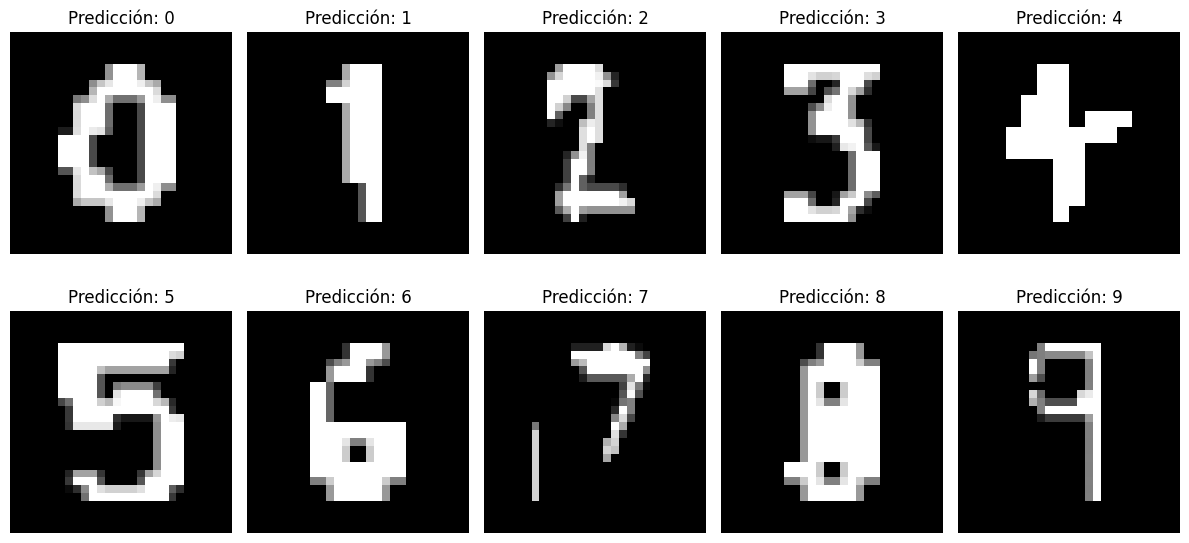

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

model = load_model("mnist_model.h5")
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

archivos = [
    "imagenes_propias/0.jpg",
    "imagenes_propias/1.jpg",
    "imagenes_propias/2.jpg",
    "imagenes_propias/3.jpg",
    "imagenes_propias/4.jpg",
    "imagenes_propias/5.jpg",
    "imagenes_propias/6.jpg",
    "imagenes_propias/7.jpg",
    "imagenes_propias/8.jpg",
    "imagenes_propias/9.jpg"
]

imagenes_procesadas = []

def centrar_imagen(imagen):
    # Encontrar el contorno del número
    coords = cv2.findNonZero(imagen)
    x, y, w, h = cv2.boundingRect(coords)
    recorte = imagen[y:y+h, x:x+w]

    # Redimensionar para que el dígito más largo sea 20 píxeles
    margen = 4  # 28 - 20 = 8 / 2
    if h > w:
        nueva_altura = 20
        nueva_anchura = int((w / h) * 20)
    else:
        nueva_anchura = 20
        nueva_altura = int((h / w) * 20)

    imagen_redimensionada = cv2.resize(recorte, (nueva_anchura, nueva_altura), interpolation=cv2.INTER_AREA)

    # Crear una imagen negra de 28x28
    canvas = np.zeros((28, 28), dtype=np.uint8)
    x_offset = (28 - nueva_anchura) // 2
    y_offset = (28 - nueva_altura) // 2

    # Pegar la imagen redimensionada en el centro del canvas
    canvas[y_offset:y_offset + nueva_altura, x_offset:x_offset + nueva_anchura] = imagen_redimensionada

    return canvas

for archivo in archivos:
    imagen = cv2.imread(archivo, cv2.IMREAD_GRAYSCALE)
    imagen = cv2.resize(imagen, (28, 28), interpolation=cv2.INTER_AREA)

    # Binarizar e invertir
    _, imagen = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY_INV)

    # Centrar el dígito en el canvas
    imagen = centrar_imagen(imagen)

    # Normalizar y dar forma
    imagen = imagen.astype("float32") / 255.0
    imagen = imagen.reshape(28, 28, 1)

    imagenes_procesadas.append(imagen)

imagenes_np = np.array(imagenes_procesadas)
predicciones = model.predict(imagenes_np)
etiquetas = np.argmax(predicciones, axis=1)

# Mostrar los resultados
plt.figure(figsize=(12, 6))
for i in range(len(imagenes_np)):
    plt.subplot(2, 5, i+1)
    plt.imshow(imagenes_np[i].reshape(28, 28), cmap="gray")
    plt.title(f"Predicción: {etiquetas[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()



##PUNTO 4

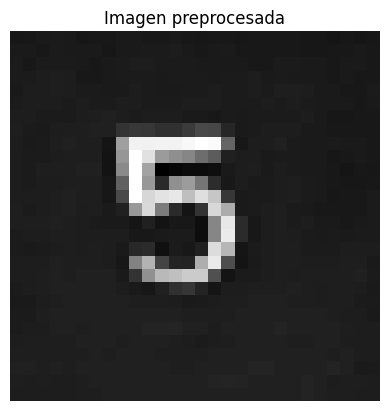

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


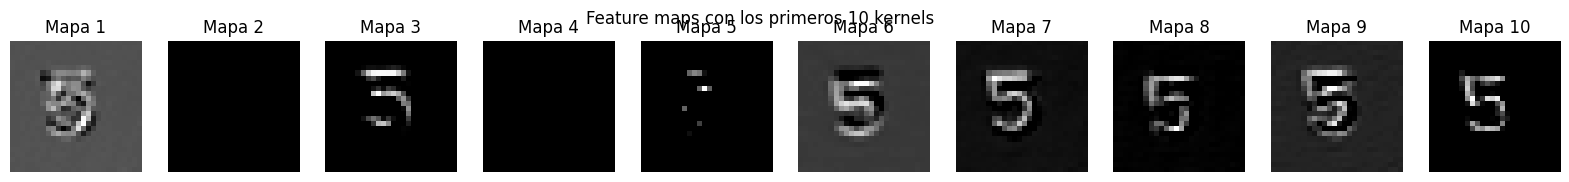

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input

# 1. Procesar la imagen
img_path = "5.jpg"
img = Image.open(img_path).convert("L")
img_array = np.array(img)
img_inverted = 255 - img_array  # Fondo negro, número blanco
img_resized = Image.fromarray(img_inverted).resize((28, 28))
img_final = np.array(img_resized) / 255.0
img_input = np.expand_dims(np.expand_dims(img_final, axis=0), axis=-1)

plt.imshow(img_final, cmap='gray')
plt.title("Imagen preprocesada")
plt.axis('off')
plt.show()

# 2. Cargar el modelo y forzar su construcción
model = load_model("mnist_model.h5")
_ = model.predict(np.zeros((1, 28, 28, 1)))  # Forzar construcción

# 3. Buscar la primera capa convolucional
first_conv_layer = None
for layer in model.layers:
    if 'conv' in layer.name:
        first_conv_layer = layer
        break

# 4. Reconstruir el modelo hasta la primera capa convolucional (compatible con Sequential y Functional)
inputs = Input(shape=(28,28,1))
x = inputs
for layer in model.layers:
    x = layer(x)
    if layer == first_conv_layer:
        break
model_cut = Model(inputs=inputs, outputs=x)

# 5. Aplicar los kernels a la imagen y mostrar los primeros 10 feature maps
feature_maps = model_cut.predict(img_input)

fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(feature_maps[0, :, :, i], cmap='gray')
    axes[i].set_title(f'Mapa {i+1}')
    axes[i].axis('off')
plt.suptitle("Feature maps con los primeros 10 kernels")
plt.show()